In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [37]:
# only one input variable
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

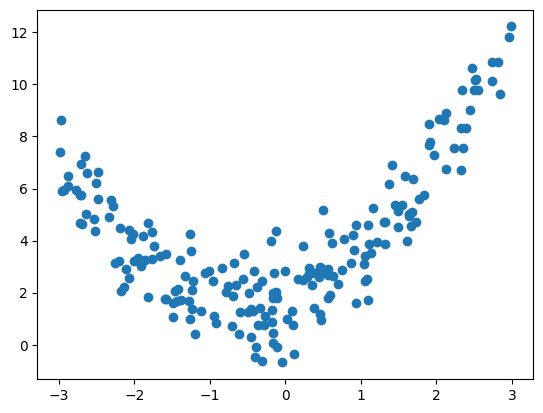

In [38]:
plt.scatter(X,y)

In [39]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
X_test

array([[ 0.8908098 ],
       [ 0.22854537],
       [ 2.22826753],
       [-2.11447806],
       [ 0.38515923],
       [ 0.45229973],
       [ 2.3293439 ],
       [-2.64827823],
       [-2.31252756],
       [-0.31238056],
       [ 1.63419373],
       [-0.96144301],
       [ 2.50808411],
       [-1.76428803],
       [ 2.73340002],
       [-0.33034491],
       [ 0.46338269],
       [-0.41107125],
       [-2.33021547],
       [ 1.04901403]])

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
# if we give it param includebias=false then it will no include 1 as included below beacuse by that we mean that we 
# dont require bias term


X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)
print(poly.powers_)

[[0]
 [1]
 [2]]


In [41]:
X_test_trans

array([[ 1.        ,  0.8908098 ,  0.7935421 ],
       [ 1.        ,  0.22854537,  0.05223299],
       [ 1.        ,  2.22826753,  4.96517618],
       [ 1.        , -2.11447806,  4.47101749],
       [ 1.        ,  0.38515923,  0.14834763],
       [ 1.        ,  0.45229973,  0.20457504],
       [ 1.        ,  2.3293439 ,  5.42584299],
       [ 1.        , -2.64827823,  7.01337759],
       [ 1.        , -2.31252756,  5.34778372],
       [ 1.        , -0.31238056,  0.09758161],
       [ 1.        ,  1.63419373,  2.67058915],
       [ 1.        , -0.96144301,  0.92437267],
       [ 1.        ,  2.50808411,  6.29048591],
       [ 1.        , -1.76428803,  3.11271224],
       [ 1.        ,  2.73340002,  7.47147566],
       [ 1.        , -0.33034491,  0.10912776],
       [ 1.        ,  0.46338269,  0.21472351],
       [ 1.        , -0.41107125,  0.16897958],
       [ 1.        , -2.33021547,  5.42990414],
       [ 1.        ,  1.04901403,  1.10043044]])

In [42]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train_trans,y_train)

y_pred=lr.predict(X_test_trans)


In [43]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8886375303936969

In [44]:
lr.coef_

array([[0.        , 0.89310354, 0.87532682]])

In [45]:
lr.intercept_

array([1.78535927])

In [50]:
# creating new points in same range that follow a line and predicting them to get a good graph
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

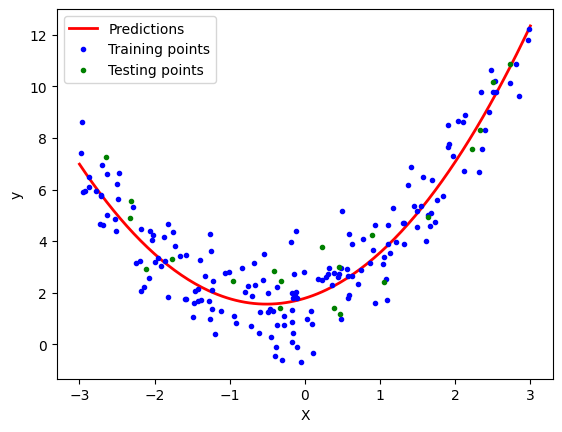

In [51]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()